## Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier

from jenga.basis import Dataset
from jenga.models.simple_model import SimpleModel
from jenga.corruptions.perturbations import Perturbation
from jenga.cleaning.imputation import MeanModeImputation, DatawigImputation
from jenga.cleaning.outlier_detection import PyODKNN, PyODIsolationForest

In [2]:
seed = 10

In [3]:
dataset = Dataset(seed, "credit-g")

Dataset 'credit-g', target: 'class'
**Author**: Dr. Hans Hofmann  

**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    

**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)



**German Credit data**  

This dataset classifies people described by a set of attributes as good or bad credit risks.



This dataset comes with a cost matrix: 

``` 

      Good  Bad (predicted)  

Good   0    1   (actual)  

Bad    5    0  

```



It is worse to class a customer as go

Attribute types: 


,attribute_names,categorical_indicator
0,checking_status,True
1,duration,False
2,credit_history,True
3,purpose,True
4,credit_amount,False
5,savings_status,True
6,employment,True
7,installment_commitment,False
8,personal_status,True
9,other_parties,True


In [4]:
all_data = dataset.all_data
all_data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [5]:
attribute_names = dataset.attribute_names
attribute_names

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker']

In [6]:
attribute_types = dataset.attribute_types
attribute_types

,attribute_names,categorical_indicator
0,checking_status,True
1,duration,False
2,credit_history,True
3,purpose,True
4,credit_amount,False
5,savings_status,True
6,employment,True
7,installment_commitment,False
8,personal_status,True
9,other_parties,True


### Visualize the dataset

In [7]:
## plot the original dataset
def hide_current_axis(*args, **kwds):
        plt.gca().set_visible(False)
        
def plot_data(data):
    sns.set_style("white") # grid/no grid style: darkgrid, whitegrid, dark, white, ticks
    
    plot = sns.pairplot(data, hue="class")
    plot.map_upper(hide_current_axis)
    plt.show()

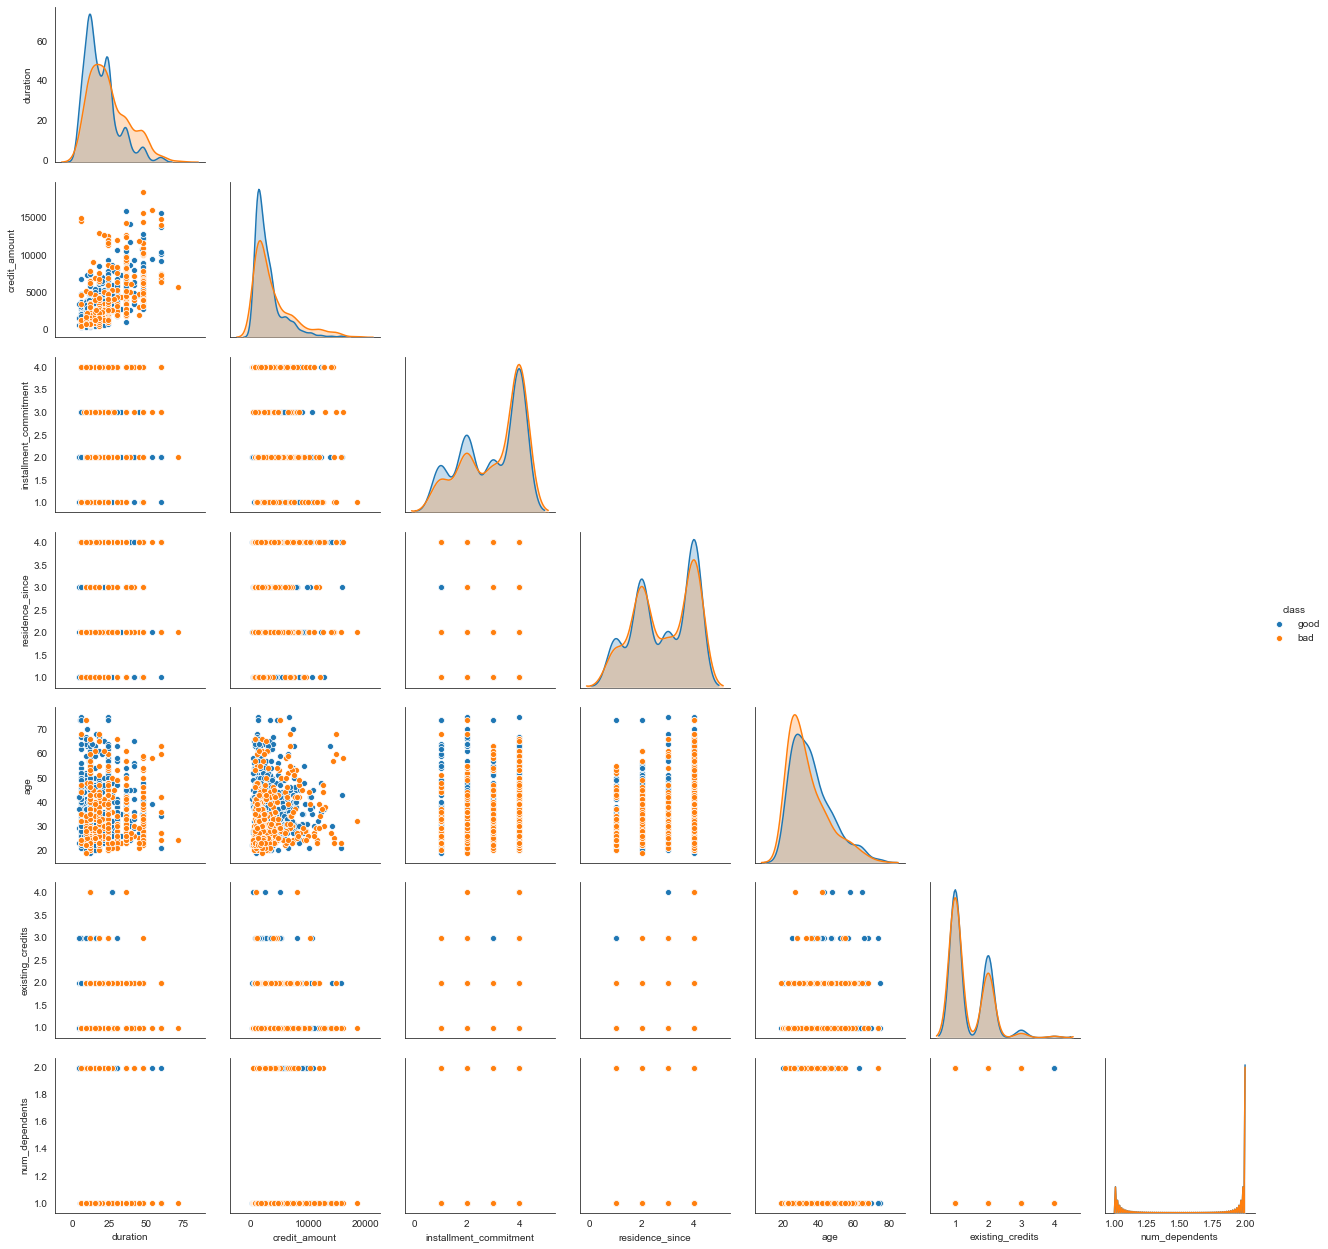

In [8]:
plot_data(all_data)

### Get training and test sets

In [9]:
train_data, train_labels, test_data, test_labels = dataset.get_train_test_data()

display(train_data.head())
print(train_labels[0:5])

display(test_data.head())
print(test_labels[0:5])

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
188,<0,12.0,existing paid,radio/tv,674.0,100<=X<500,4<=X<7,4.0,male mar/wid,none,1.0,life insurance,20.0,none,own,1.0,skilled,1.0,none,yes
194,0<=X<200,45.0,existing paid,radio/tv,3031.0,100<=X<500,1<=X<4,4.0,male single,guarantor,4.0,life insurance,21.0,none,rent,1.0,skilled,1.0,none,yes
225,no checking,36.0,no credits/all paid,repairs,2613.0,<100,1<=X<4,4.0,male single,none,2.0,car,27.0,none,own,2.0,skilled,1.0,none,yes
580,0<=X<200,18.0,critical/other existing credit,new car,1056.0,<100,>=7,3.0,male single,guarantor,3.0,real estate,30.0,bank,own,2.0,skilled,1.0,none,yes
428,no checking,9.0,existing paid,furniture/equipment,1313.0,<100,>=7,1.0,male single,none,4.0,car,20.0,none,own,1.0,skilled,1.0,none,yes


['bad' 'bad' 'good' 'bad' 'good']


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
841,no checking,21.0,delayed previously,used car,2993.0,<100,1<=X<4,3.0,male single,none,2.0,real estate,28.0,stores,own,2.0,unskilled resident,1.0,none,yes
956,>=200,30.0,critical/other existing credit,radio/tv,3656.0,no known savings,>=7,4.0,male single,none,4.0,life insurance,49.0,stores,own,2.0,unskilled resident,1.0,none,yes
544,no checking,12.0,critical/other existing credit,new car,1255.0,<100,>=7,4.0,male single,none,4.0,real estate,61.0,none,own,2.0,unskilled resident,1.0,none,yes
173,0<=X<200,8.0,existing paid,radio/tv,1414.0,<100,1<=X<4,4.0,male single,guarantor,2.0,real estate,33.0,none,own,1.0,skilled,1.0,none,no
759,<0,12.0,critical/other existing credit,new car,691.0,<100,>=7,4.0,male single,none,3.0,life insurance,35.0,none,own,2.0,skilled,1.0,none,yes


['good' 'good' 'good' 'good' 'bad']


## Model

In [10]:
learner = SGDClassifier(max_iter=1000)
param_grid = {
    'learner__loss': ['log'],
    'learner__penalty': ['l2', 'l1', 'elasticnet'],
    'learner__alpha': [0.0001, 0.001, 0.01, 0.1]
}

In [11]:
model_obj = SimpleModel(seed, train_data, train_labels, test_data, test_labels, attribute_types, learner, param_grid)

In [12]:
categorical_columns = model_obj.categorical_columns
categorical_columns

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [13]:
numerical_columms = model_obj.numerical_columms
numerical_columms

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [14]:
model = model_obj.fit_baseline_model(train_data, train_labels)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   11.3s finished


## Corruptions

In [15]:
# corruption perturbations to apply
corr_perturbations = Perturbation(categorical_columns, numerical_columms)

In [16]:
test_data_corrupted, perturbations, cols_perturbed = corr_perturbations.apply_perturbation(test_data, 5)
test_data_corrupted

GaussianNoise: {'column': 'residence_since', 'fraction': 0.25}
['residence_since']
MissingValues: {'column': 'credit_history', 'fraction': 0.5, 'na_value': nan, 'missingness': 'MAR'}
['credit_history']
GaussianNoise: {'column': 'duration', 'fraction': 0.25}
['duration']
MissingValues: {'column': 'credit_amount', 'fraction': 0.75, 'na_value': nan, 'missingness': 'MAR'}
['credit_amount']
SwappedValues: {'column_a': 'housing', 'column_b': 'personal_status', 'fraction': 0.25}
['housing', 'personal_status']


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
841,no checking,21.000000,delayed previously,used car,2993.0,<100,1<=X<4,3.0,male single,none,0.193852,real estate,28.0,stores,own,2.0,unskilled resident,1.0,none,yes
956,>=200,30.000000,NaN,radio/tv,NaN,no known savings,>=7,4.0,male single,none,4.000000,life insurance,49.0,stores,own,2.0,unskilled resident,1.0,none,yes
544,no checking,-3.982692,NaN,new car,NaN,<100,>=7,4.0,male single,none,4.000000,real estate,61.0,none,own,2.0,unskilled resident,1.0,none,yes
173,0<=X<200,-30.933795,NaN,radio/tv,NaN,<100,1<=X<4,4.0,male single,guarantor,2.000000,real estate,33.0,none,own,1.0,skilled,1.0,none,no
759,<0,12.000000,critical/other existing credit,new car,691.0,<100,>=7,4.0,male single,none,7.827427,life insurance,35.0,none,own,2.0,skilled,1.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,<0,30.000000,existing paid,repairs,11998.0,<100,<1,1.0,male div/sep,none,1.000000,no known property,34.0,none,own,1.0,unskilled resident,1.0,yes,yes
192,0<=X<200,27.000000,NaN,business,NaN,<100,1<=X<4,4.0,male single,none,2.000000,car,36.0,none,own,1.0,skilled,2.0,yes,yes
398,0<=X<200,12.000000,existing paid,new car,1223.0,<100,>=7,1.0,rent,none,1.000000,real estate,46.0,none,male div/sep,2.0,skilled,1.0,none,yes
450,no checking,30.597022,critical/other existing credit,used car,11054.0,no known savings,1<=X<4,4.0,male single,none,5.279632,car,30.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes


In [17]:
perturbations

In [18]:
cols_perturbed

['residence_since',
 'credit_history',
 'duration',
 'credit_amount',
 'housing',
 'personal_status']

### Visualize the original and corrupted test set

D:\Users\rupal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Users\rupal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


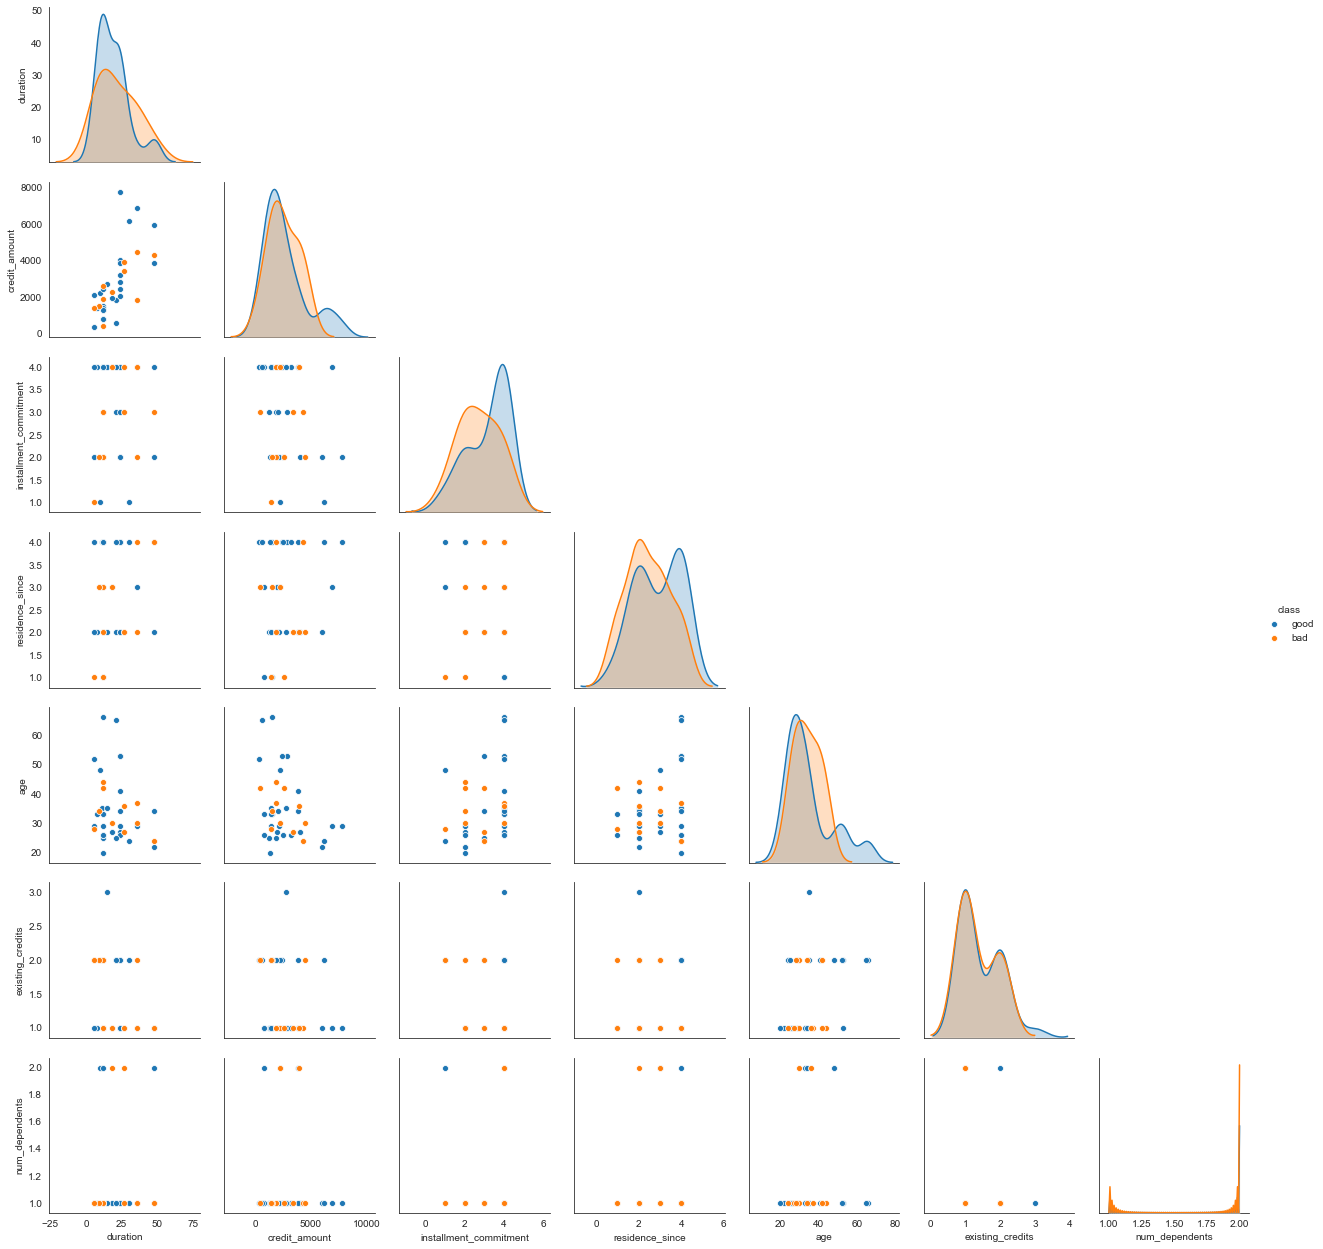

In [19]:
## original test data
plot_data(pd.concat([test_data, pd.Series(test_labels, name='class')], axis=1))

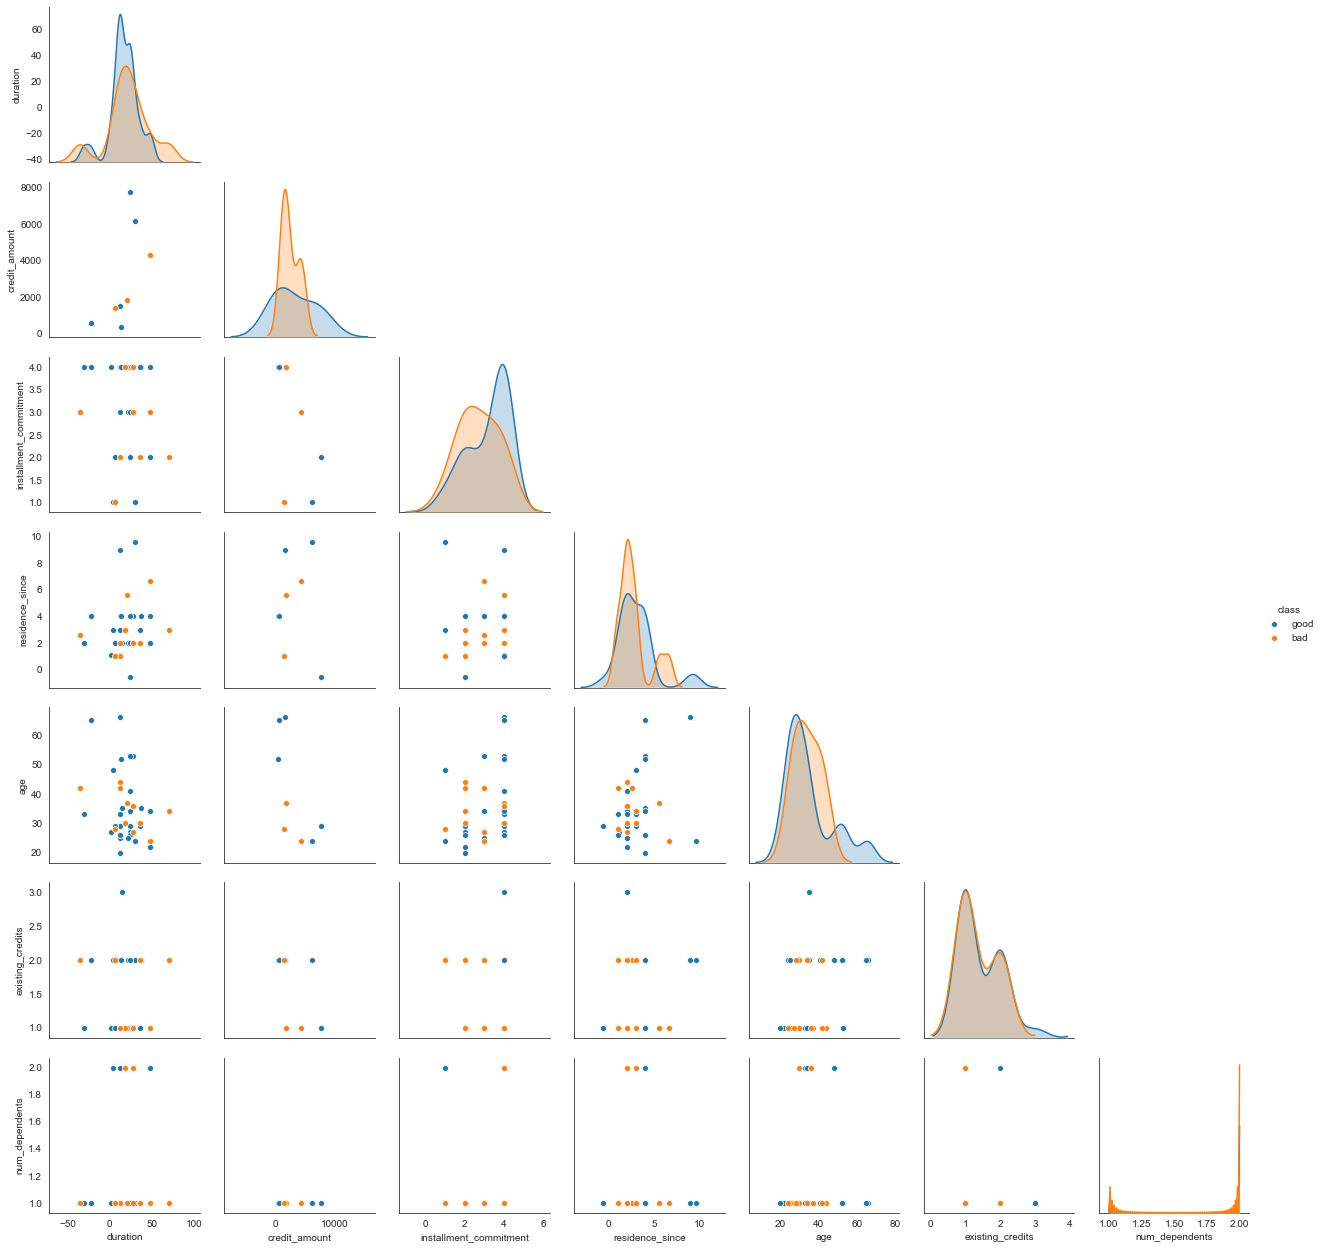

In [20]:
## corrupted test data
plot_data(pd.concat([test_data_corrupted, pd.Series(test_labels, name='class')], axis=1))

## Cleaning

### Imputation

In [21]:
mean_mode_imputer = MeanModeImputation(train_data, test_data_corrupted, categorical_columns, numerical_columms)

mean_mode_imputer.fit(train_data)
test_data_mm_imputed = mean_mode_imputer.transform(test_data_corrupted)
test_data_mm_imputed

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
841,no checking,21.000000,delayed previously,used car,2993.000,<100,1<=X<4,3.0,male single,none,0.193852,real estate,28.0,stores,own,2.0,unskilled resident,1.0,none,yes
956,>=200,30.000000,existing paid,radio/tv,3297.265,no known savings,>=7,4.0,male single,none,4.000000,life insurance,49.0,stores,own,2.0,unskilled resident,1.0,none,yes
544,no checking,-3.982692,existing paid,new car,3297.265,<100,>=7,4.0,male single,none,4.000000,real estate,61.0,none,own,2.0,unskilled resident,1.0,none,yes
173,0<=X<200,-30.933795,existing paid,radio/tv,3297.265,<100,1<=X<4,4.0,male single,guarantor,2.000000,real estate,33.0,none,own,1.0,skilled,1.0,none,no
759,<0,12.000000,critical/other existing credit,new car,691.000,<100,>=7,4.0,male single,none,7.827427,life insurance,35.0,none,own,2.0,skilled,1.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,<0,30.000000,existing paid,repairs,11998.000,<100,<1,1.0,male div/sep,none,1.000000,no known property,34.0,none,own,1.0,unskilled resident,1.0,yes,yes
192,0<=X<200,27.000000,existing paid,business,3297.265,<100,1<=X<4,4.0,male single,none,2.000000,car,36.0,none,own,1.0,skilled,2.0,yes,yes
398,0<=X<200,12.000000,existing paid,new car,1223.000,<100,>=7,1.0,rent,none,1.000000,real estate,46.0,none,male div/sep,2.0,skilled,1.0,none,yes
450,no checking,30.597022,critical/other existing credit,used car,11054.000,no known savings,1<=X<4,4.0,male single,none,5.279632,car,30.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes


In [23]:
datawig_imputer = DatawigImputation(train_data, test_data_corrupted, categorical_columns, numerical_columms)

test_data_dw_imputed = datawig_imputer.fit_transform(train_data, test_data_corrupted)
test_data_dw_imputed

2020-06-20 01:12:22,441 [INFO]  CategoricalEncoder for column checking_status                                found only 44 occurrences of value >=200


Fitting model for column: checking_status


2020-06-20 01:12:24,144 [INFO]  
========== start: fit model
2020-06-20 01:12:24,146 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:12:24,876 [INFO]  Epoch[0] Batch [0-23]	Speed: 568.97 samples/sec	cross-entropy=1.268765	checking_status-accuracy=0.369792
2020-06-20 01:12:25,488 [INFO]  Epoch[0] Train-cross-entropy=1.228151
2020-06-20 01:12:25,492 [INFO]  Epoch[0] Train-checking_status-accuracy=0.383333
2020-06-20 01:12:25,495 [INFO]  Epoch[0] Time cost=1.339
2020-06-20 01:12:25,511 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:12:25,637 [INFO]  Epoch[0] Validation-cross-entropy=1.041230
2020-06-20 01:12:25,640 [INFO]  Epoch[0] Validation-checking_status-accuracy=0.550000
2020-06-20 01:12:26,356 [INFO]  Epoch[1] Batch [0-23]	Speed: 542.46 samples/sec	cross-entropy=1.128069	checking_status-accuracy=0.445312
2020-06-20 01:12:27,179 [INFO]  Epoch[1] Train-cross-entropy=1.130764
2020-06-20 01:12:27,182 [INFO]  Epoch[1] Train-checking_status-accuracy=0.

Fitting model for column: credit_history


2020-06-20 01:12:46,532 [INFO]  
========== start: fit model
2020-06-20 01:12:46,535 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:12:47,337 [INFO]  Epoch[0] Batch [0-23]	Speed: 504.14 samples/sec	cross-entropy=1.093920	credit_history-accuracy=0.575521
2020-06-20 01:12:48,068 [INFO]  Epoch[0] Train-cross-entropy=1.053159
2020-06-20 01:12:48,071 [INFO]  Epoch[0] Train-credit_history-accuracy=0.619444
2020-06-20 01:12:48,075 [INFO]  Epoch[0] Time cost=1.532
2020-06-20 01:12:48,104 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:12:48,237 [INFO]  Epoch[0] Validation-cross-entropy=0.852260
2020-06-20 01:12:48,241 [INFO]  Epoch[0] Validation-credit_history-accuracy=0.700000
2020-06-20 01:12:49,031 [INFO]  Epoch[1] Batch [0-23]	Speed: 508.38 samples/sec	cross-entropy=0.872258	credit_history-accuracy=0.703125
2020-06-20 01:12:49,810 [INFO]  Epoch[1] Train-cross-entropy=0.895406
2020-06-20 01:12:49,813 [INFO]  Epoch[1] Train-credit_history-accuracy=0.70277

Fitting model for column: purpose


2020-06-20 01:13:00,645 [WARNING]  Test set does not contain any ocurrences of values [other, retraining] in column [purpose], consider using a more representative test set.
2020-06-20 01:13:00,666 [INFO]  
========== start: fit model
2020-06-20 01:13:00,670 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:13:01,809 [INFO]  Epoch[0] Batch [0-23]	Speed: 369.35 samples/sec	cross-entropy=1.860507	purpose-accuracy=0.236979
2020-06-20 01:13:02,610 [INFO]  Epoch[0] Train-cross-entropy=1.785119
2020-06-20 01:13:02,614 [INFO]  Epoch[0] Train-purpose-accuracy=0.275000
2020-06-20 01:13:02,617 [INFO]  Epoch[0] Time cost=1.935
2020-06-20 01:13:02,660 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:13:02,800 [INFO]  Epoch[0] Validation-cross-entropy=1.758717
2020-06-20 01:13:02,806 [INFO]  Epoch[0] Validation-purpose-accuracy=0.300000
2020-06-20 01:13:03,876 [INFO]  Epoch[1] Batch [0-23]	Speed: 367.13 samples/sec	cross-entropy=1.607048	purpose-accuracy=0.307292
20

2020-06-20 01:13:28,140 [INFO]  CategoricalEncoder for column savings_status                                found only 42 occurrences of value 500<=X<1000
2020-06-20 01:13:28,148 [INFO]  CategoricalEncoder for column savings_status                                found only 32 occurrences of value >=1000


Fitting model for column: savings_status


2020-06-20 01:13:30,365 [INFO]  
========== start: fit model
2020-06-20 01:13:30,369 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:13:31,266 [INFO]  Epoch[0] Batch [0-23]	Speed: 456.39 samples/sec	cross-entropy=1.116572	savings_status-accuracy=0.635417
2020-06-20 01:13:31,894 [INFO]  Epoch[0] Train-cross-entropy=1.164640
2020-06-20 01:13:31,898 [INFO]  Epoch[0] Train-savings_status-accuracy=0.601389
2020-06-20 01:13:31,902 [INFO]  Epoch[0] Time cost=1.527
2020-06-20 01:13:31,920 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:13:32,051 [INFO]  Epoch[0] Validation-cross-entropy=1.250440
2020-06-20 01:13:32,055 [INFO]  Epoch[0] Validation-savings_status-accuracy=0.487500
2020-06-20 01:13:32,891 [INFO]  Epoch[1] Batch [0-23]	Speed: 470.71 samples/sec	cross-entropy=0.974883	savings_status-accuracy=0.653646
2020-06-20 01:13:33,582 [INFO]  Epoch[1] Train-cross-entropy=1.064461
2020-06-20 01:13:33,586 [INFO]  Epoch[1] Train-savings_status-accuracy=0.61111

Fitting model for column: employment


2020-06-20 01:13:44,935 [INFO]  
========== start: fit model
2020-06-20 01:13:44,938 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:13:45,719 [INFO]  Epoch[0] Batch [0-23]	Speed: 518.59 samples/sec	cross-entropy=1.462356	employment-accuracy=0.341146
2020-06-20 01:13:46,428 [INFO]  Epoch[0] Train-cross-entropy=1.395851
2020-06-20 01:13:46,432 [INFO]  Epoch[0] Train-employment-accuracy=0.387500
2020-06-20 01:13:46,436 [INFO]  Epoch[0] Time cost=1.489
2020-06-20 01:13:46,451 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:13:46,590 [INFO]  Epoch[0] Validation-cross-entropy=1.199168
2020-06-20 01:13:46,594 [INFO]  Epoch[0] Validation-employment-accuracy=0.487500
2020-06-20 01:13:47,320 [INFO]  Epoch[1] Batch [0-23]	Speed: 537.09 samples/sec	cross-entropy=1.278361	employment-accuracy=0.429688
2020-06-20 01:13:47,987 [INFO]  Epoch[1] Train-cross-entropy=1.275214
2020-06-20 01:13:47,991 [INFO]  Epoch[1] Train-employment-accuracy=0.441667
2020-06-20 01:13:4

Fitting model for column: personal_status


2020-06-20 01:14:03,188 [INFO]  
========== start: fit model
2020-06-20 01:14:03,192 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:14:03,966 [INFO]  Epoch[0] Batch [0-23]	Speed: 511.40 samples/sec	cross-entropy=1.084109	personal_status-accuracy=0.562500
2020-06-20 01:14:04,623 [INFO]  Epoch[0] Train-cross-entropy=1.006318
2020-06-20 01:14:04,627 [INFO]  Epoch[0] Train-personal_status-accuracy=0.584722
2020-06-20 01:14:04,632 [INFO]  Epoch[0] Time cost=1.432
2020-06-20 01:14:04,645 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:14:04,771 [INFO]  Epoch[0] Validation-cross-entropy=0.889600
2020-06-20 01:14:04,775 [INFO]  Epoch[0] Validation-personal_status-accuracy=0.587500
2020-06-20 01:14:05,520 [INFO]  Epoch[1] Batch [0-23]	Speed: 521.16 samples/sec	cross-entropy=0.895888	personal_status-accuracy=0.622396
2020-06-20 01:14:06,218 [INFO]  Epoch[1] Train-cross-entropy=0.887257
2020-06-20 01:14:06,222 [INFO]  Epoch[1] Train-personal_status-accuracy=0.

Fitting model for column: other_parties


2020-06-20 01:14:19,654 [INFO]  
========== start: fit model
2020-06-20 01:14:19,656 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:14:20,319 [INFO]  Epoch[0] Batch [0-23]	Speed: 601.79 samples/sec	cross-entropy=0.550021	other_parties-accuracy=0.872396
2020-06-20 01:14:20,948 [INFO]  Epoch[0] Train-cross-entropy=0.472783
2020-06-20 01:14:20,957 [INFO]  Epoch[0] Train-other_parties-accuracy=0.887500
2020-06-20 01:14:20,964 [INFO]  Epoch[0] Time cost=1.297
2020-06-20 01:14:20,984 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:14:21,094 [INFO]  Epoch[0] Validation-cross-entropy=0.342126
2020-06-20 01:14:21,100 [INFO]  Epoch[0] Validation-other_parties-accuracy=0.912500
2020-06-20 01:14:22,268 [INFO]  Epoch[1] Batch [0-23]	Speed: 324.95 samples/sec	cross-entropy=0.353778	other_parties-accuracy=0.898438
2020-06-20 01:14:22,903 [INFO]  Epoch[1] Train-cross-entropy=0.353915
2020-06-20 01:14:22,908 [INFO]  Epoch[1] Train-other_parties-accuracy=0.901389
202

Fitting model for column: property_magnitude


2020-06-20 01:14:43,504 [INFO]  
========== start: fit model
2020-06-20 01:14:43,507 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:14:44,267 [INFO]  Epoch[0] Batch [0-23]	Speed: 520.37 samples/sec	cross-entropy=1.289555	property_magnitude-accuracy=0.346354
2020-06-20 01:14:45,021 [INFO]  Epoch[0] Train-cross-entropy=1.266042
2020-06-20 01:14:45,026 [INFO]  Epoch[0] Train-property_magnitude-accuracy=0.366667
2020-06-20 01:14:45,032 [INFO]  Epoch[0] Time cost=1.513
2020-06-20 01:14:45,060 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:14:45,189 [INFO]  Epoch[0] Validation-cross-entropy=1.112859
2020-06-20 01:14:45,194 [INFO]  Epoch[0] Validation-property_magnitude-accuracy=0.450000
2020-06-20 01:14:45,930 [INFO]  Epoch[1] Batch [0-23]	Speed: 534.35 samples/sec	cross-entropy=1.139370	property_magnitude-accuracy=0.427083
2020-06-20 01:14:46,602 [INFO]  Epoch[1] Train-cross-entropy=1.156401
2020-06-20 01:14:46,607 [INFO]  Epoch[1] Train-property_magnit

2020-06-20 01:15:08,231 [INFO]  Epoch[13] Time cost=1.572
2020-06-20 01:15:08,248 [INFO]  Saved checkpoint to "imputer_model\model-0013.params"
2020-06-20 01:15:08,377 [INFO]  Epoch[13] Validation-cross-entropy=1.054062
2020-06-20 01:15:08,381 [INFO]  Epoch[13] Validation-property_magnitude-accuracy=0.500000
2020-06-20 01:15:09,251 [INFO]  Epoch[14] Batch [0-23]	Speed: 454.69 samples/sec	cross-entropy=0.922998	property_magnitude-accuracy=0.570312
2020-06-20 01:15:10,010 [INFO]  Epoch[14] Train-cross-entropy=0.930416
2020-06-20 01:15:10,016 [INFO]  Epoch[14] Train-property_magnitude-accuracy=0.577778
2020-06-20 01:15:10,020 [INFO]  Epoch[14] Time cost=1.634
2020-06-20 01:15:10,047 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-06-20 01:15:10,178 [INFO]  Epoch[14] Validation-cross-entropy=1.054572
2020-06-20 01:15:10,182 [INFO]  Epoch[14] Validation-property_magnitude-accuracy=0.487500
2020-06-20 01:15:11,204 [INFO]  Epoch[15] Batch [0-23]	Speed: 377.65 samples/sec	cr

Fitting model for column: other_payment_plans


2020-06-20 01:15:17,530 [INFO]  
========== start: fit model
2020-06-20 01:15:17,533 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:15:18,218 [INFO]  Epoch[0] Batch [0-23]	Speed: 596.56 samples/sec	cross-entropy=0.729161	other_payment_plans-accuracy=0.778646
2020-06-20 01:15:18,782 [INFO]  Epoch[0] Train-cross-entropy=0.667336
2020-06-20 01:15:18,787 [INFO]  Epoch[0] Train-other_payment_plans-accuracy=0.790278
2020-06-20 01:15:18,791 [INFO]  Epoch[0] Time cost=1.242
2020-06-20 01:15:18,806 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:15:18,932 [INFO]  Epoch[0] Validation-cross-entropy=0.506722
2020-06-20 01:15:18,939 [INFO]  Epoch[0] Validation-other_payment_plans-accuracy=0.850000
2020-06-20 01:15:19,614 [INFO]  Epoch[1] Batch [0-23]	Speed: 581.28 samples/sec	cross-entropy=0.542656	other_payment_plans-accuracy=0.817708
2020-06-20 01:15:20,213 [INFO]  Epoch[1] Train-cross-entropy=0.549933
2020-06-20 01:15:20,217 [INFO]  Epoch[1] Train-other_payme

Fitting model for column: housing


2020-06-20 01:15:34,601 [INFO]  
========== start: fit model
2020-06-20 01:15:34,606 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:15:35,317 [INFO]  Epoch[0] Batch [0-23]	Speed: 574.74 samples/sec	cross-entropy=0.808380	housing-accuracy=0.692708
2020-06-20 01:15:35,897 [INFO]  Epoch[0] Train-cross-entropy=0.729816
2020-06-20 01:15:35,901 [INFO]  Epoch[0] Train-housing-accuracy=0.715278
2020-06-20 01:15:35,906 [INFO]  Epoch[0] Time cost=1.289
2020-06-20 01:15:35,920 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:15:36,034 [INFO]  Epoch[0] Validation-cross-entropy=0.579415
2020-06-20 01:15:36,038 [INFO]  Epoch[0] Validation-housing-accuracy=0.750000
2020-06-20 01:15:36,725 [INFO]  Epoch[1] Batch [0-23]	Speed: 579.69 samples/sec	cross-entropy=0.631313	housing-accuracy=0.742188
2020-06-20 01:15:37,355 [INFO]  Epoch[1] Train-cross-entropy=0.606776
2020-06-20 01:15:37,359 [INFO]  Epoch[1] Train-housing-accuracy=0.752778
2020-06-20 01:15:37,367 [INFO]  E

Fitting model for column: job


2020-06-20 01:15:58,667 [WARNING]  Test set does not contain any ocurrences of values [unemp/unskilled non res] in column [job], consider using a more representative test set.
2020-06-20 01:15:58,685 [INFO]  
========== start: fit model
2020-06-20 01:15:58,689 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:15:59,448 [INFO]  Epoch[0] Batch [0-23]	Speed: 527.12 samples/sec	cross-entropy=1.064887	job-accuracy=0.580729
2020-06-20 01:16:00,254 [INFO]  Epoch[0] Train-cross-entropy=0.944705
2020-06-20 01:16:00,258 [INFO]  Epoch[0] Train-job-accuracy=0.626389
2020-06-20 01:16:00,269 [INFO]  Epoch[0] Time cost=1.571
2020-06-20 01:16:00,389 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:16:00,641 [INFO]  Epoch[0] Validation-cross-entropy=0.741681
2020-06-20 01:16:00,645 [INFO]  Epoch[0] Validation-job-accuracy=0.712500
2020-06-20 01:16:01,707 [INFO]  Epoch[1] Batch [0-23]	Speed: 371.46 samples/sec	cross-entropy=0.867121	job-accuracy=0.630208
2020-06-20 01:16

Fitting model for column: own_telephone


2020-06-20 01:16:16,625 [INFO]  
========== start: fit model
2020-06-20 01:16:16,630 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:16:17,332 [INFO]  Epoch[0] Batch [0-23]	Speed: 558.60 samples/sec	cross-entropy=0.670664	own_telephone-accuracy=0.656250
2020-06-20 01:16:17,913 [INFO]  Epoch[0] Train-cross-entropy=0.629312
2020-06-20 01:16:17,918 [INFO]  Epoch[0] Train-own_telephone-accuracy=0.661111
2020-06-20 01:16:17,924 [INFO]  Epoch[0] Time cost=1.285
2020-06-20 01:16:17,940 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:16:18,057 [INFO]  Epoch[0] Validation-cross-entropy=0.564016
2020-06-20 01:16:18,061 [INFO]  Epoch[0] Validation-own_telephone-accuracy=0.762500
2020-06-20 01:16:18,755 [INFO]  Epoch[1] Batch [0-23]	Speed: 558.63 samples/sec	cross-entropy=0.548923	own_telephone-accuracy=0.718750
2020-06-20 01:16:19,377 [INFO]  Epoch[1] Train-cross-entropy=0.551015
2020-06-20 01:16:19,382 [INFO]  Epoch[1] Train-own_telephone-accuracy=0.708333
202

Fitting model for column: foreign_worker


2020-06-20 01:16:36,634 [INFO]  
========== start: fit model
2020-06-20 01:16:36,641 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:16:37,333 [INFO]  Epoch[0] Batch [0-23]	Speed: 574.28 samples/sec	cross-entropy=0.357856	foreign_worker-accuracy=0.937500
2020-06-20 01:16:37,889 [INFO]  Epoch[0] Train-cross-entropy=0.244714
2020-06-20 01:16:37,895 [INFO]  Epoch[0] Train-foreign_worker-accuracy=0.954167
2020-06-20 01:16:37,901 [INFO]  Epoch[0] Time cost=1.250
2020-06-20 01:16:37,919 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:16:38,034 [INFO]  Epoch[0] Validation-cross-entropy=0.112072
2020-06-20 01:16:38,038 [INFO]  Epoch[0] Validation-foreign_worker-accuracy=0.975000
2020-06-20 01:16:38,716 [INFO]  Epoch[1] Batch [0-23]	Speed: 573.85 samples/sec	cross-entropy=0.169829	foreign_worker-accuracy=0.950521
2020-06-20 01:16:39,324 [INFO]  Epoch[1] Train-cross-entropy=0.147426
2020-06-20 01:16:39,329 [INFO]  Epoch[1] Train-foreign_worker-accuracy=0.96111

2020-06-20 01:16:58,438 [INFO]  Epoch[13] Validation-cross-entropy=0.093260
2020-06-20 01:16:58,442 [INFO]  Epoch[13] Validation-foreign_worker-accuracy=0.975000
2020-06-20 01:16:59,198 [INFO]  Epoch[14] Batch [0-23]	Speed: 527.59 samples/sec	cross-entropy=0.101170	foreign_worker-accuracy=0.955729
2020-06-20 01:16:59,879 [INFO]  Epoch[14] Train-cross-entropy=0.096086
2020-06-20 01:16:59,888 [INFO]  Epoch[14] Train-foreign_worker-accuracy=0.963889
2020-06-20 01:16:59,893 [INFO]  Epoch[14] Time cost=1.444
2020-06-20 01:16:59,932 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-06-20 01:17:00,441 [INFO]  No improvement detected for 5 epochs compared to 0.09104409497231244 last error obtained: 0.09415160343050957, stopping here
2020-06-20 01:17:00,453 [INFO]  
========== done (23.820077180862427 s) fit model
D:\Users\rupal\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wi

Fitting model for column: duration


2020-06-20 01:17:04,479 [INFO]  
========== start: fit model
2020-06-20 01:17:04,486 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:17:05,089 [INFO]  Epoch[0] Batch [0-23]	Speed: 660.11 samples/sec	cross-entropy=12.522029	duration-accuracy=0.000000
2020-06-20 01:17:05,637 [INFO]  Epoch[0] Train-cross-entropy=10.374978
2020-06-20 01:17:05,642 [INFO]  Epoch[0] Train-duration-accuracy=0.000000
2020-06-20 01:17:05,648 [INFO]  Epoch[0] Time cost=1.154
2020-06-20 01:17:05,664 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:17:05,787 [INFO]  Epoch[0] Validation-cross-entropy=8.513726
2020-06-20 01:17:05,791 [INFO]  Epoch[0] Validation-duration-accuracy=0.000000
2020-06-20 01:17:06,398 [INFO]  Epoch[1] Batch [0-23]	Speed: 650.18 samples/sec	cross-entropy=8.008059	duration-accuracy=0.000000
2020-06-20 01:17:06,981 [INFO]  Epoch[1] Train-cross-entropy=7.725542
2020-06-20 01:17:06,986 [INFO]  Epoch[1] Train-duration-accuracy=0.000000
2020-06-20 01:17:06,991 [I

Fitting model for column: credit_amount


2020-06-20 01:17:22,869 [INFO]  
========== start: fit model
2020-06-20 01:17:22,875 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:17:23,525 [INFO]  Epoch[0] Batch [0-23]	Speed: 613.42 samples/sec	cross-entropy=10.913261	credit_amount-accuracy=0.000000
2020-06-20 01:17:24,067 [INFO]  Epoch[0] Train-cross-entropy=9.155470
2020-06-20 01:17:24,071 [INFO]  Epoch[0] Train-credit_amount-accuracy=0.000000
2020-06-20 01:17:24,078 [INFO]  Epoch[0] Time cost=1.195
2020-06-20 01:17:24,091 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:17:24,212 [INFO]  Epoch[0] Validation-cross-entropy=8.022968
2020-06-20 01:17:24,219 [INFO]  Epoch[0] Validation-credit_amount-accuracy=0.000000
2020-06-20 01:17:24,859 [INFO]  Epoch[1] Batch [0-23]	Speed: 604.37 samples/sec	cross-entropy=7.420990	credit_amount-accuracy=0.000000
2020-06-20 01:17:25,403 [INFO]  Epoch[1] Train-cross-entropy=6.801761
2020-06-20 01:17:25,409 [INFO]  Epoch[1] Train-credit_amount-accuracy=0.000000
20

Fitting model for column: installment_commitment


2020-06-20 01:17:37,927 [INFO]  
========== start: fit model
2020-06-20 01:17:37,934 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:17:38,590 [INFO]  Epoch[0] Batch [0-23]	Speed: 610.37 samples/sec	cross-entropy=14.021334	installment_commitment-accuracy=0.000000
2020-06-20 01:17:39,214 [INFO]  Epoch[0] Train-cross-entropy=14.087924
2020-06-20 01:17:39,219 [INFO]  Epoch[0] Train-installment_commitment-accuracy=0.000000
2020-06-20 01:17:39,225 [INFO]  Epoch[0] Time cost=1.281
2020-06-20 01:17:39,239 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:17:39,370 [INFO]  Epoch[0] Validation-cross-entropy=12.456070
2020-06-20 01:17:39,376 [INFO]  Epoch[0] Validation-installment_commitment-accuracy=0.000000
2020-06-20 01:17:40,088 [INFO]  Epoch[1] Batch [0-23]	Speed: 557.78 samples/sec	cross-entropy=11.958796	installment_commitment-accuracy=0.000000
2020-06-20 01:17:40,688 [INFO]  Epoch[1] Train-cross-entropy=12.516481
2020-06-20 01:17:40,697 [INFO]  Epoch[1] 

2020-06-20 01:17:56,587 [INFO]  Epoch[13] Train-cross-entropy=10.209562
2020-06-20 01:17:56,595 [INFO]  Epoch[13] Train-installment_commitment-accuracy=0.000000
2020-06-20 01:17:56,601 [INFO]  Epoch[13] Time cost=1.355
2020-06-20 01:17:56,617 [INFO]  Saved checkpoint to "imputer_model\model-0013.params"
2020-06-20 01:17:56,728 [INFO]  Epoch[13] Validation-cross-entropy=10.711257
2020-06-20 01:17:56,732 [INFO]  Epoch[13] Validation-installment_commitment-accuracy=0.000000
2020-06-20 01:17:57,399 [INFO]  Epoch[14] Batch [0-23]	Speed: 583.35 samples/sec	cross-entropy=9.765031	installment_commitment-accuracy=0.000000
2020-06-20 01:17:57,967 [INFO]  Epoch[14] Train-cross-entropy=10.159273
2020-06-20 01:17:57,972 [INFO]  Epoch[14] Train-installment_commitment-accuracy=0.000000
2020-06-20 01:17:57,980 [INFO]  Epoch[14] Time cost=1.242
2020-06-20 01:17:57,997 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-06-20 01:17:58,111 [INFO]  Epoch[14] Validation-cross-entropy=10.7036

Fitting model for column: residence_since


2020-06-20 01:18:14,192 [INFO]  
========== start: fit model
2020-06-20 01:18:14,198 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:18:14,808 [INFO]  Epoch[0] Batch [0-23]	Speed: 648.48 samples/sec	cross-entropy=15.446965	residence_since-accuracy=0.000000
2020-06-20 01:18:15,347 [INFO]  Epoch[0] Train-cross-entropy=15.683610
2020-06-20 01:18:15,351 [INFO]  Epoch[0] Train-residence_since-accuracy=0.000000
2020-06-20 01:18:15,357 [INFO]  Epoch[0] Time cost=1.149
2020-06-20 01:18:15,372 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:18:15,484 [INFO]  Epoch[0] Validation-cross-entropy=13.337671
2020-06-20 01:18:15,490 [INFO]  Epoch[0] Validation-residence_since-accuracy=0.000000
2020-06-20 01:18:16,139 [INFO]  Epoch[1] Batch [0-23]	Speed: 597.06 samples/sec	cross-entropy=13.936457	residence_since-accuracy=0.000000
2020-06-20 01:18:16,702 [INFO]  Epoch[1] Train-cross-entropy=14.323074
2020-06-20 01:18:16,707 [INFO]  Epoch[1] Train-residence_since-accura

Fitting model for column: age


2020-06-20 01:18:25,975 [INFO]  
========== start: fit model
2020-06-20 01:18:25,981 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:18:26,607 [INFO]  Epoch[0] Batch [0-23]	Speed: 656.55 samples/sec	cross-entropy=14.978664	age-accuracy=0.000000
2020-06-20 01:18:27,537 [INFO]  Epoch[0] Train-cross-entropy=14.787153
2020-06-20 01:18:27,543 [INFO]  Epoch[0] Train-age-accuracy=0.000000
2020-06-20 01:18:27,549 [INFO]  Epoch[0] Time cost=1.557
2020-06-20 01:18:27,587 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:18:27,753 [INFO]  Epoch[0] Validation-cross-entropy=19.034067
2020-06-20 01:18:27,760 [INFO]  Epoch[0] Validation-age-accuracy=0.000000
2020-06-20 01:18:28,436 [INFO]  Epoch[1] Batch [0-23]	Speed: 585.07 samples/sec	cross-entropy=13.363408	age-accuracy=0.000000
2020-06-20 01:18:29,045 [INFO]  Epoch[1] Train-cross-entropy=13.370264
2020-06-20 01:18:29,051 [INFO]  Epoch[1] Train-age-accuracy=0.000000
2020-06-20 01:18:29,056 [INFO]  Epoch[1] Time co

2020-06-20 01:18:47,170 [INFO]  Epoch[14] Time cost=1.211
2020-06-20 01:18:47,195 [INFO]  Saved checkpoint to "imputer_model\model-0014.params"
2020-06-20 01:18:47,315 [INFO]  Epoch[14] Validation-cross-entropy=15.668352
2020-06-20 01:18:47,321 [INFO]  Epoch[14] Validation-age-accuracy=0.000000
2020-06-20 01:18:47,950 [INFO]  Epoch[15] Batch [0-23]	Speed: 621.13 samples/sec	cross-entropy=10.254567	age-accuracy=0.000000
2020-06-20 01:18:48,898 [INFO]  Epoch[15] Train-cross-entropy=10.251558
2020-06-20 01:18:48,904 [INFO]  Epoch[15] Train-age-accuracy=0.000000
2020-06-20 01:18:48,911 [INFO]  Epoch[15] Time cost=1.583
2020-06-20 01:18:48,931 [INFO]  Saved checkpoint to "imputer_model\model-0015.params"
2020-06-20 01:18:49,065 [INFO]  Epoch[15] Validation-cross-entropy=15.645553
2020-06-20 01:18:49,070 [INFO]  Epoch[15] Validation-age-accuracy=0.000000
2020-06-20 01:18:49,778 [INFO]  Epoch[16] Batch [0-23]	Speed: 558.22 samples/sec	cross-entropy=10.190851	age-accuracy=0.000000
2020-06-20 0

Fitting model for column: existing_credits


2020-06-20 01:19:02,429 [INFO]  
========== start: fit model
2020-06-20 01:19:02,434 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:19:03,548 [INFO]  Epoch[0] Batch [0-23]	Speed: 362.46 samples/sec	cross-entropy=15.432427	existing_credits-accuracy=0.000000
2020-06-20 01:19:04,436 [INFO]  Epoch[0] Train-cross-entropy=15.451835
2020-06-20 01:19:04,442 [INFO]  Epoch[0] Train-existing_credits-accuracy=0.000000
2020-06-20 01:19:04,448 [INFO]  Epoch[0] Time cost=2.004
2020-06-20 01:19:04,495 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:19:04,663 [INFO]  Epoch[0] Validation-cross-entropy=12.630088
2020-06-20 01:19:04,669 [INFO]  Epoch[0] Validation-existing_credits-accuracy=0.000000
2020-06-20 01:19:05,398 [INFO]  Epoch[1] Batch [0-23]	Speed: 556.54 samples/sec	cross-entropy=13.254403	existing_credits-accuracy=0.000000
2020-06-20 01:19:06,008 [INFO]  Epoch[1] Train-cross-entropy=13.556121
2020-06-20 01:19:06,014 [INFO]  Epoch[1] Train-existing_credits-a

Fitting model for column: num_dependents


2020-06-20 01:19:24,261 [INFO]  
========== start: fit model
2020-06-20 01:19:24,266 [WARNING]  Already bound, ignoring bind()
2020-06-20 01:19:24,890 [INFO]  Epoch[0] Batch [0-23]	Speed: 642.25 samples/sec	cross-entropy=14.749237	num_dependents-accuracy=0.000000
2020-06-20 01:19:25,401 [INFO]  Epoch[0] Train-cross-entropy=15.496638
2020-06-20 01:19:25,407 [INFO]  Epoch[0] Train-num_dependents-accuracy=0.000000
2020-06-20 01:19:25,414 [INFO]  Epoch[0] Time cost=1.137
2020-06-20 01:19:25,432 [INFO]  Saved checkpoint to "imputer_model\model-0000.params"
2020-06-20 01:19:25,567 [INFO]  Epoch[0] Validation-cross-entropy=14.288271
2020-06-20 01:19:25,572 [INFO]  Epoch[0] Validation-num_dependents-accuracy=0.000000
2020-06-20 01:19:26,192 [INFO]  Epoch[1] Batch [0-23]	Speed: 630.06 samples/sec	cross-entropy=13.342008	num_dependents-accuracy=0.000000
2020-06-20 01:19:26,801 [INFO]  Epoch[1] Train-cross-entropy=14.334253
2020-06-20 01:19:26,807 [INFO]  Epoch[1] Train-num_dependents-accuracy=0.

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,own_telephone_imputed_proba,foreign_worker_imputed,foreign_worker_imputed_proba,duration_imputed,credit_amount_imputed,installment_commitment_imputed,residence_since_imputed,age_imputed,existing_credits_imputed,num_dependents_imputed
841,no checking,21.000000,delayed previously,used car,2993.0,<100,1<=X<4,3.0,male single,none,...,0.859826,yes,0.998539,25.658036,1688.810916,2.561293,2.520354,36.608716,1.281256,1.497626
956,>=200,30.000000,nan,radio/tv,NaN,no known savings,>=7,4.0,male single,none,...,0.553256,yes,0.999945,29.663918,2698.151955,3.335788,3.268311,40.108341,1.190151,1.357273
544,no checking,-3.982692,nan,new car,NaN,<100,>=7,4.0,male single,none,...,0.587879,yes,0.972572,27.017926,-1569.564605,0.599685,3.844867,49.001558,1.506234,1.387069
173,0<=X<200,-30.933795,nan,radio/tv,NaN,<100,1<=X<4,4.0,male single,guarantor,...,0.927966,yes,0.685996,29.854260,-2601.910557,-2.127695,1.979826,44.480967,1.018461,1.491788
759,<0,12.000000,critical/other existing credit,new car,691.0,<100,>=7,4.0,male single,none,...,0.653490,yes,0.999999,20.490117,895.391660,4.089063,3.098232,60.315520,1.678404,1.317242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,<0,30.000000,existing paid,repairs,11998.0,<100,<1,1.0,male div/sep,none,...,0.683512,yes,0.784586,39.603827,4603.649874,1.841168,3.150204,38.706307,1.044434,1.363225
192,0<=X<200,27.000000,nan,business,NaN,<100,1<=X<4,4.0,male single,none,...,0.716277,yes,0.999006,30.704337,2909.113032,2.609083,2.905943,32.053858,1.650182,1.165087
398,0<=X<200,12.000000,existing paid,new car,1223.0,<100,>=7,1.0,rent,none,...,0.727899,yes,0.964549,15.088344,520.551171,2.975305,3.044962,31.365160,1.102354,1.614041
450,no checking,30.597022,critical/other existing credit,used car,11054.0,no known savings,1<=X<4,4.0,male single,none,...,0.971311,yes,0.999969,50.915807,5258.206647,2.377065,2.542742,43.649370,1.844160,1.154327


In [24]:
test_data_dw_imputed.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'checking_status_imputed',
       'checking_status_imputed_proba', 'credit_history_imputed',
       'credit_history_imputed_proba', 'purpose_imputed',
       'purpose_imputed_proba', 'savings_status_imputed',
       'savings_status_imputed_proba', 'employment_imputed',
       'employment_imputed_proba', 'personal_status_imputed',
       'personal_status_imputed_proba', 'other_parties_imputed',
       'other_parties_imputed_proba', 'property_magnitude_imputed',
       'property_magnitude_imputed_proba', 'other_payment_plans_imputed',
       'other_payment_plans_imputed_proba', 'housing_imputed',
       'housing_imputed

### Outlier Detection

In [25]:
outlier = PyODKNN(train_data, test_data_corrupted, categorical_columns, numerical_columms)

In [26]:
test_data_corrupted_outliers = outlier.fit_transform(train_data, test_data_corrupted)
test_data_corrupted_outliers

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,outlier
841,no checking,21.000000,delayed previously,used car,2993.0,<100,1<=X<4,3.0,male single,none,...,real estate,28.0,stores,own,2.0,unskilled resident,1.0,none,yes,0
956,>=200,30.000000,nan,radio/tv,NaN,no known savings,>=7,4.0,male single,none,...,life insurance,49.0,stores,own,2.0,unskilled resident,1.0,none,yes,0
544,no checking,-3.982692,nan,new car,NaN,<100,>=7,4.0,male single,none,...,real estate,61.0,none,own,2.0,unskilled resident,1.0,none,yes,0
173,0<=X<200,-30.933795,nan,radio/tv,NaN,<100,1<=X<4,4.0,male single,guarantor,...,real estate,33.0,none,own,1.0,skilled,1.0,none,no,1
759,<0,12.000000,critical/other existing credit,new car,691.0,<100,>=7,4.0,male single,none,...,life insurance,35.0,none,own,2.0,skilled,1.0,none,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,<0,30.000000,existing paid,repairs,11998.0,<100,<1,1.0,male div/sep,none,...,no known property,34.0,none,own,1.0,unskilled resident,1.0,yes,yes,1
192,0<=X<200,27.000000,nan,business,NaN,<100,1<=X<4,4.0,male single,none,...,car,36.0,none,own,1.0,skilled,2.0,yes,yes,0
398,0<=X<200,12.000000,existing paid,new car,1223.0,<100,>=7,1.0,rent,none,...,real estate,46.0,none,male div/sep,2.0,skilled,1.0,none,yes,0
450,no checking,30.597022,critical/other existing credit,used car,11054.0,no known savings,1<=X<4,4.0,male single,none,...,car,30.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0


In [27]:
outlier_if = PyODIsolationForest(train_data, test_data_corrupted, categorical_columns, numerical_columms)

In [28]:
test_data_corrupted_outliers_if = outlier_if.fit_transform(train_data, test_data_corrupted)
test_data_corrupted_outliers_if

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,outlier
841,no checking,21.000000,delayed previously,used car,2993.0,<100,1<=X<4,3.0,male single,none,...,real estate,28.0,stores,own,2.0,unskilled resident,1.0,none,yes,1
956,>=200,30.000000,nan,radio/tv,NaN,no known savings,>=7,4.0,male single,none,...,life insurance,49.0,stores,own,2.0,unskilled resident,1.0,none,yes,1
544,no checking,-3.982692,nan,new car,NaN,<100,>=7,4.0,male single,none,...,real estate,61.0,none,own,2.0,unskilled resident,1.0,none,yes,0
173,0<=X<200,-30.933795,nan,radio/tv,NaN,<100,1<=X<4,4.0,male single,guarantor,...,real estate,33.0,none,own,1.0,skilled,1.0,none,no,1
759,<0,12.000000,critical/other existing credit,new car,691.0,<100,>=7,4.0,male single,none,...,life insurance,35.0,none,own,2.0,skilled,1.0,none,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,<0,30.000000,existing paid,repairs,11998.0,<100,<1,1.0,male div/sep,none,...,no known property,34.0,none,own,1.0,unskilled resident,1.0,yes,yes,1
192,0<=X<200,27.000000,nan,business,NaN,<100,1<=X<4,4.0,male single,none,...,car,36.0,none,own,1.0,skilled,2.0,yes,yes,0
398,0<=X<200,12.000000,existing paid,new car,1223.0,<100,>=7,1.0,rent,none,...,real estate,46.0,none,male div/sep,2.0,skilled,1.0,none,yes,0
450,no checking,30.597022,critical/other existing credit,used car,11054.0,no known savings,1<=X<4,4.0,male single,none,...,car,30.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,0
